./DQN_result.npy: len=40, total=1423.00, mean(×100)=14.23
./DQN_Decision Tree_result.npy: len=100, total=1627.00, mean(×100)=16.27
./DQN_Linear Regression_result.npy: len=100, total=1088.00, mean(×100)=10.88
./DQN_Logistic Regression_result.npy: len=100, total=1248.00, mean(×100)=12.48
./PPO_result.npy: len=40, total=1414.00, mean(×100)=14.14
./PPO_Decision Tree_result.npy: len=400, total=1271.00, mean(×100)=12.71
./PPO_Linear Regression_result.npy: len=400, total=1271.00, mean(×100)=12.71
./PPO_Logistic Regression_result.npy: len=400, total=1269.00, mean(×100)=12.69
./A2C_result.npy: len=100, total=2528.00, mean(×100)=25.28
./A2C_Decision Tree_result.npy: len=130, total=2848.00, mean(×100)=28.48
./A2C_Linear Regression_result.npy: len=100, total=1767.00, mean(×100)=17.67
./A2C_Logistic Regression_result.npy: len=106, total=2565.00, mean(×100)=25.65


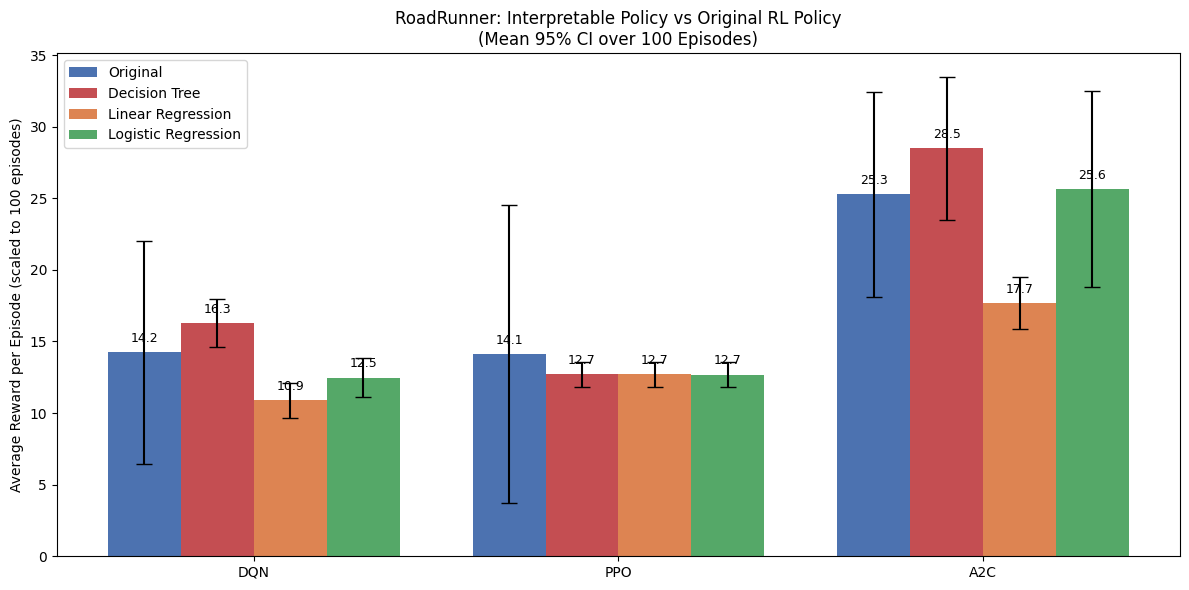

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 定义算法和解释模型
algorithms = ["DQN", "PPO", "A2C"]
models = ["Original", "Decision Tree", "Linear Regression", "Logistic Regression"]
colors = ["#4C72B0", "#C44E52", "#DD8452", "#55A868"]

means = {alg: [] for alg in algorithms}
cis = {alg: [] for alg in algorithms}

# 遍历算法和模型，加载对应的.npy文件
for alg in algorithms:
    for model in models:
        if model == "Original":
            fname = f"./{alg}_result.npy"
        else:
            fname = f"./{alg}_{model}_result.npy"

        if not os.path.exists(fname):
            print(f"⚠️ 文件不存在: {fname}")
            m, s, ci = 0, 0, 0
        else:
            vals = np.load(fname)

            if len(vals) == 0:
                print(f"⚠️ 空文件: {fname}")
                m, s, ci = 0, 0, 0
            else:
                total = np.sum(vals)
                m = total / 100  # ✅ 将总和标准化为100局
                s = np.std(vals, ddof=1)
                ci = 1.96 * s / np.sqrt(100)  # 置信区间按100局计算

                print(f"{fname}: len={len(vals)}, total={total:.2f}, mean(×100)={m:.2f}")

        means[alg].append(m)
        cis[alg].append(ci)

# 绘图
x = np.arange(len(algorithms))
width = 0.2

plt.figure(figsize=(12, 6))

for i, model in enumerate(models):
    offset = (i - 1.5) * width
    bars = plt.bar(
        x + offset,
        [means[alg][i] for alg in algorithms],
        width,
        yerr=[cis[alg][i] for alg in algorithms],
        capsize=6,
        label=model,
        color=colors[i],
    )
    # 在柱子顶部显示数值
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f"{height:.1f}",
            ha="center", va="bottom", fontsize=9
        )

plt.xticks(x, algorithms)
plt.ylabel("Average Reward per Episode (scaled to 100 episodes)")
plt.title("RoadRunner: Interpretable Policy vs Original RL Policy\n(Mean 95% CI over 100 Episodes)")
plt.legend()
plt.tight_layout()
plt.show()


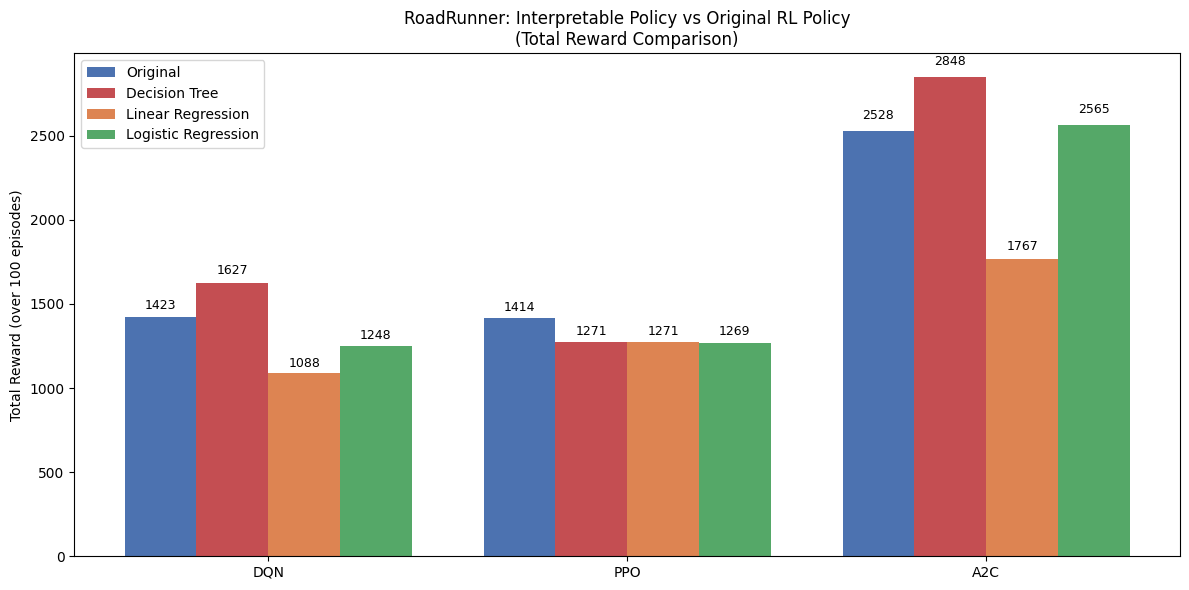

In [2]:
algorithms = ["DQN", "PPO", "A2C"]
models = ["Original", "Decision Tree", "Linear Regression", "Logistic Regression"]

# 论文风格配色
colors = ["#4C72B0", "#C44E52", "#DD8452", "#55A868"]

totals = {alg: [] for alg in algorithms}

# 遍历三种 RL 算法，加载 total reward
for alg in algorithms:
    for model in models:
        if model == "Original":
            fname = f"./{alg}_result.npy"
        else:
            fname = f"./{alg}_{model}_result.npy"

        vals = np.load(fname)
        totals[alg].append(np.sum(vals))   # 这里用 sum 而不是 mean

x = np.arange(len(algorithms))
width = 0.2

plt.figure(figsize=(12, 6))

for i, model in enumerate(models):
    offset = (i - 1.5) * width
    bars = plt.bar(
        x + offset,
        [totals[alg][i] for alg in algorithms],
        width,
        label=model,
        color=colors[i],
    )
    # 在柱子上加数值
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.02*height,
            f"{height:.0f}",  # 总奖励整数即可
            ha="center", va="bottom", fontsize=9
        )

plt.xticks(x, algorithms)
plt.ylabel("Total Reward (over 100 episodes)")
plt.title("RoadRunner: Interpretable Policy vs Original RL Policy\n(Total Reward Comparison)")
plt.legend()
plt.tight_layout()
plt.show()